In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from nmf import *

In [3]:
audio_file = '../data/sounds_mixedX.wav'
y, sr = librosa.load(audio_file)

In [4]:
D = librosa.stft(y)
magnitude = np.abs(D)
magnitude_db = librosa.amplitude_to_db(magnitude, ref=np.max)
print(magnitude_db)

[[-80.       -76.166725 -68.117676 ... -67.41107  -52.141293 -51.273243]
 [-80.       -74.49762  -76.79349  ... -48.90861  -48.36339  -55.60383 ]
 [-80.       -71.33743  -65.47412  ... -41.08111  -45.792778 -55.250084]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -78.25949 ]
 [-80.       -80.       -80.       ... -80.       -80.       -78.27994 ]
 [-80.       -80.       -80.       ... -80.       -80.       -78.28447 ]]


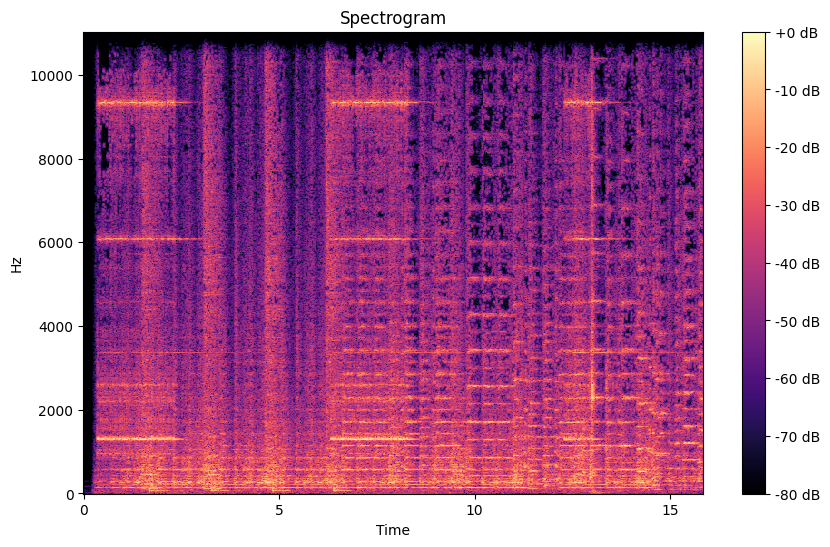

In [5]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(magnitude_db, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [8]:
print(magnitude_db.shape)
rank = 300
max_iter = int(1e4)
W, H = multiplicative_update(magnitude_db, rank, max_iter)
print(W)
print()
print(H)
print()
print(W @ H)

(1025, 683)
